In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SEED = 42

In [3]:
latent_vectors = np.load('../vectors/latent_vector_55112.npy')
original = np.load('../vectors/originales.npy')
labels = np.load('../vectors/labels_originales.npy')

lv = pd.DataFrame(latent_vectors)
og = pd.DataFrame(original)

print(lv.info())
print(og.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 55112 entries, 0 to 55111
dtypes: float32(55112)
memory usage: 21.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 110250 entries, 0 to 110249
dtypes: float32(110250)
memory usage: 42.1 MB
None


In [4]:
latent_size = lv.shape[1]

### K-means

In [ ]:
k = 10
kmeans_lv = make_pipeline(StandardScaler(), KMeans(n_clusters=k, max_iter=30, n_init=20, random_state=SEED))
kmeans_lv.fit(lv)
print(kmeans_lv[1].labels_)

In [ ]:
print(kmeans_lv[1].labels_[21])
print(kmeans_lv[1].labels_[54])

In [ ]:
k = 10
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, max_iter=30, n_init=20, random_state=SEED))
kmeans.fit(og)
print(kmeans[1].labels_)

In [ ]:
print(kmeans[1].labels_[21])
print(kmeans[1].labels_[54])

In [ ]:
evol_variabilidad = []
for k in range(1, 41):
    kmeans = KMeans(n_clusters=k, max_iter=30, n_init=20)
    kmeans.fit(lv)
    evol_variabilidad.append({"k": k, "var": kmeans.inertia_})

evol_variabilidad = pd.DataFrame(evol_variabilidad)
plt.figure()
plt.plot(evol_variabilidad["k"], evol_variabilidad["var"], marker="o")
plt.xlabel("# Clusters")
plt.ylabel("tot.withinss")
plt.show()

### Heatmap

In [ ]:
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed

# Assuming the columns are features and rows are latent vectors, transpose the DataFrame for visualization
heatmap = sns.heatmap(lv[:15].T, cmap='coolwarm', annot=True, fmt=".2f")  # Transpose with .T to visualize rows as vectors
plt.title('Heatmap of Latent Vectors')
plt.xlabel('Latent Vectors')
plt.ylabel('Features')
plt.show()

### Decision Tree (feature importante)

Feature ranking:
1. Feature 3218 (0.1036336854439281)
2. Feature 44098 (0.10308450069381182)
3. Feature 81776 (0.10195802324247895)
4. Feature 53305 (0.09844517517151788)
5. Feature 73231 (0.09754911474897708)
6. Feature 2344 (0.09522495331240895)
7. Feature 28583 (0.06533713964054522)
8. Feature 73853 (0.053051523639758943)
9. Feature 72648 (0.04951475539710833)
10. Feature 99061 (0.048932228863024715)
11. Feature 89236 (0.04321287743747637)
12. Feature 70454 (0.02970885323826501)
13. Feature 36272 (0.02334267040149393)
14. Feature 78459 (0.019098548510313215)
15. Feature 34701 (0.016976487564722857)
16. Feature 26546 (0.016976487564722857)
17. Feature 49311 (0.016976487564722857)
18. Feature 1503 (0.016976487564722857)
19. Feature 36747 (0.0)
20. Feature 36748 (0.0)
21. Feature 36746 (0.0)
22. Feature 36749 (0.0)
23. Feature 36750 (0.0)
24. Feature 110249 (0.0)
25. Feature 36751 (0.0)
26. Feature 36752 (0.0)
27. Feature 36753 (0.0)
28. Feature 36754 (0.0)
29. Feature 36755 (0.0)
30. 

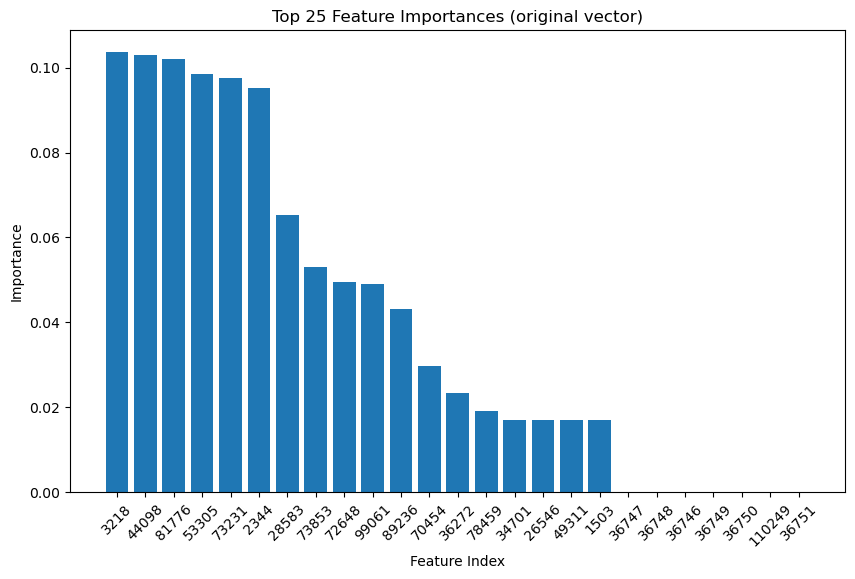

In [50]:
X = og
y = pd.DataFrame(labels)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=SEED)
clf.fit(X, y)

# Get feature importances from the trained model
feature_importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Num of top features
num_top_features = 25

# Get the indices of the top 'num_top_features' most important features
top_indices = indices[:num_top_features]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({feature_importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title(f"Top {num_top_features} Feature Importances (original vector)")
plt.bar(range(num_top_features), feature_importances[top_indices], align="center")
plt.xticks(range(num_top_features), top_indices, rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

### PCA

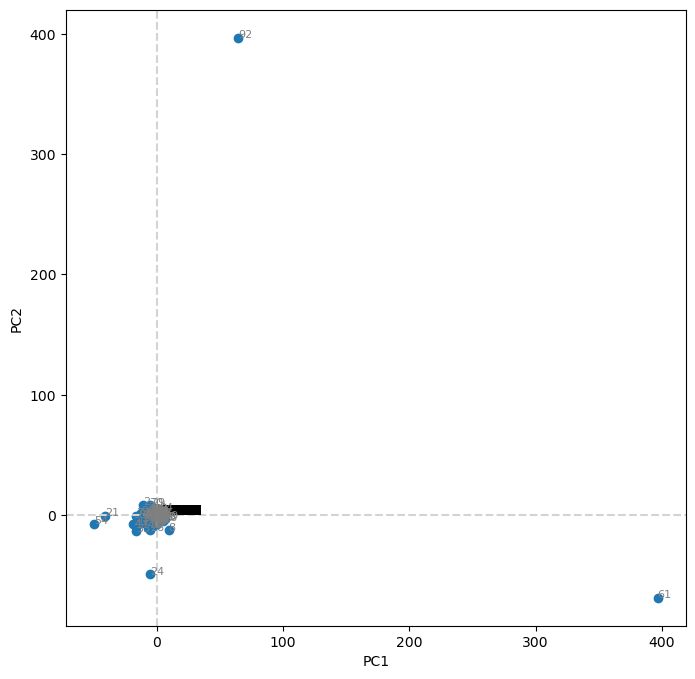

In [5]:
scaler = StandardScaler(with_std=True, with_mean=True)
scaled_lv = pd.DataFrame(scaler.fit_transform(lv))

pca = PCA()
pca.fit(scaled_lv)

# Crea un DataFrame para almacenar los resultados del PCA
scores = pd.DataFrame(pca.transform(scaled_lv), index=scaled_lv.index)
# print(scores.head())

# Veamos qué valores de los loadings se obtuvieron (cada fila es un vector de loadins)
# print(pca.components_)

def plot_biplot(pca_res, scores):
    """
    Función para crear un gráfico biplot a partir de los resultados del PCA.
    """
    i, j = 0, 1
    _, ax = plt.subplots(1, 1, figsize=(8, 8))
    
    # Grafica las puntuaciones en el espacio de las dos primeras componentes principales
    ax.scatter(scores.values[:, 0], scores.values[:, 1])
    ax.set_xlabel('PC%d' % (i + 1))
    ax.set_ylabel('PC%d' % (j + 1))
    
    # Agrega flechas y etiquetas para las cargas de las variables en el biplot
    for k in range(pca_res.components_.shape[1]):
        ax.arrow(0, 0, pca_res.components_[i, k], pca_res.components_[j, k])
        ax.text(pca_res.components_[i, k], pca_res.components_[j, k], lv.columns[k])
    
    # Agrega etiquetas a las observaciones
    for k, txt in enumerate(scores.index):
        ax.annotate(txt, (scores.values[k, 0], scores.values[k, 1]), fontsize=8, color='gray')
    
    # Agrega líneas verticales y horizontales en el origen
    ax.axvline(0, color='lightgray', linestyle='--')
    ax.axhline(0, color='lightgray', linestyle='--')

    plt.show()

# Llama a la función plot_biplot para crear el biplot
plot_biplot(pca, scores)

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting tools

# Adjusted plot_biplot function for 3D visualization
def plot_biplot_3d(pca_res, scores):
    """
    Function to create a 3D biplot from the PCA results.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    i, j, k = 0, 1, 2  # Choose the first three principal components
    
    # Plot the scores in 3D space
    ax.scatter(scores.values[:, i], scores.values[:, j], scores.values[:, k])
    ax.set_xlabel('PC%d' % (i + 1))
    ax.set_ylabel('PC%d' % (j + 1))
    ax.set_zlabel('PC%d' % (k + 1))
    
    # Add arrows and labels for the loadings of variables in the biplot
    for m in range(pca_res.components_.shape[1]):
        ax.quiver(0, 0, 0, pca_res.components_[i, m], pca_res.components_[j, m], pca_res.components_[k, m],
                  arrow_length_ratio=0.1, label=lv.columns[m])
        ax.text(pca_res.components_[i, m], pca_res.components_[j, m], pca_res.components_[k, m], lv.columns[m])
    
    # Add labels for observations
    for n, txt in enumerate(scores.index):
        ax.text(scores.values[n, i], scores.values[n, j], scores.values[n, k], txt, fontsize=8, color='gray')
    
    # Add lines at the origin
    ax.axvline(0, color='lightgray', linestyle='--')
    ax.axhline(0, color='lightgray', linestyle='--')
    ax.axzline(0, color='lightgray', linestyle='--')
    
    plt.legend()
    plt.show()

# Call the modified function to create the 3D biplot
plot_biplot_3d(pca, scores)
